In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/WOC ML Data/classification_train.csv')
a=data.to_numpy()
a

array([[    0,     8,     0, ...,     0,     0,     0],
       [    1,     4,     0, ...,     0,     0,     0],
       [    2,     1,     0, ...,     0,     0,     0],
       ...,
       [29997,     9,     0, ...,     0,     0,     0],
       [29998,     4,     0, ...,     0,     0,     0],
       [29999,     6,     0, ...,     0,     0,     0]])

In [4]:
a.shape

(30000, 786)

In [5]:
def normalize(dta):
  n=dta.shape[1]
  mean=np.zeros(n)
  dev=np.zeros(n)
  for j in range(n):
    mean[j]=np.mean(dta[:,j])
    dev[j]=np.std(dta[:,j])
  dta=(dta-mean)/dev
  return dta,mean,dev

In [6]:
x_train=a[:,range(2,a.shape[1])]
y_train=a[:,1]
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
x_train.shape

(30000, 784)

In [8]:
y_train

array([8, 4, 1, ..., 9, 4, 6])

In [9]:
y_train.shape

(30000,)

In [10]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
x_t,mean_t,dev_t=normalize(x_train[range(20000),:])
y_t=y_train[range(20000)]
x_chk=(x_train[range(20000,30000),:]-mean_t)/dev_t
y_chk=y_train[range(20000,30000)]
print(x_t.shape,y_t.shape,x_chk.shape,y_chk.shape,sep='\n')

(20000, 784)
(20000,)
(10000, 784)
(10000,)


In [12]:
print(x_t,y_t,x_chk,y_chk,sep='\n')

[[-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]
 [-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]
 [-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]
 ...
 [-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]
 [-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]
 [-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]]
[8 4 1 ... 6 2 9]
[[-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]
 [-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]
 [-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]
 ...
 [-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]
 [-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]
 [-0.01249488 -0.0247104  -0.03749339 ... -0.15659207 -0.08943918
  -0.03884714]

<function matplotlib.pyplot.show(close=None, block=None)>

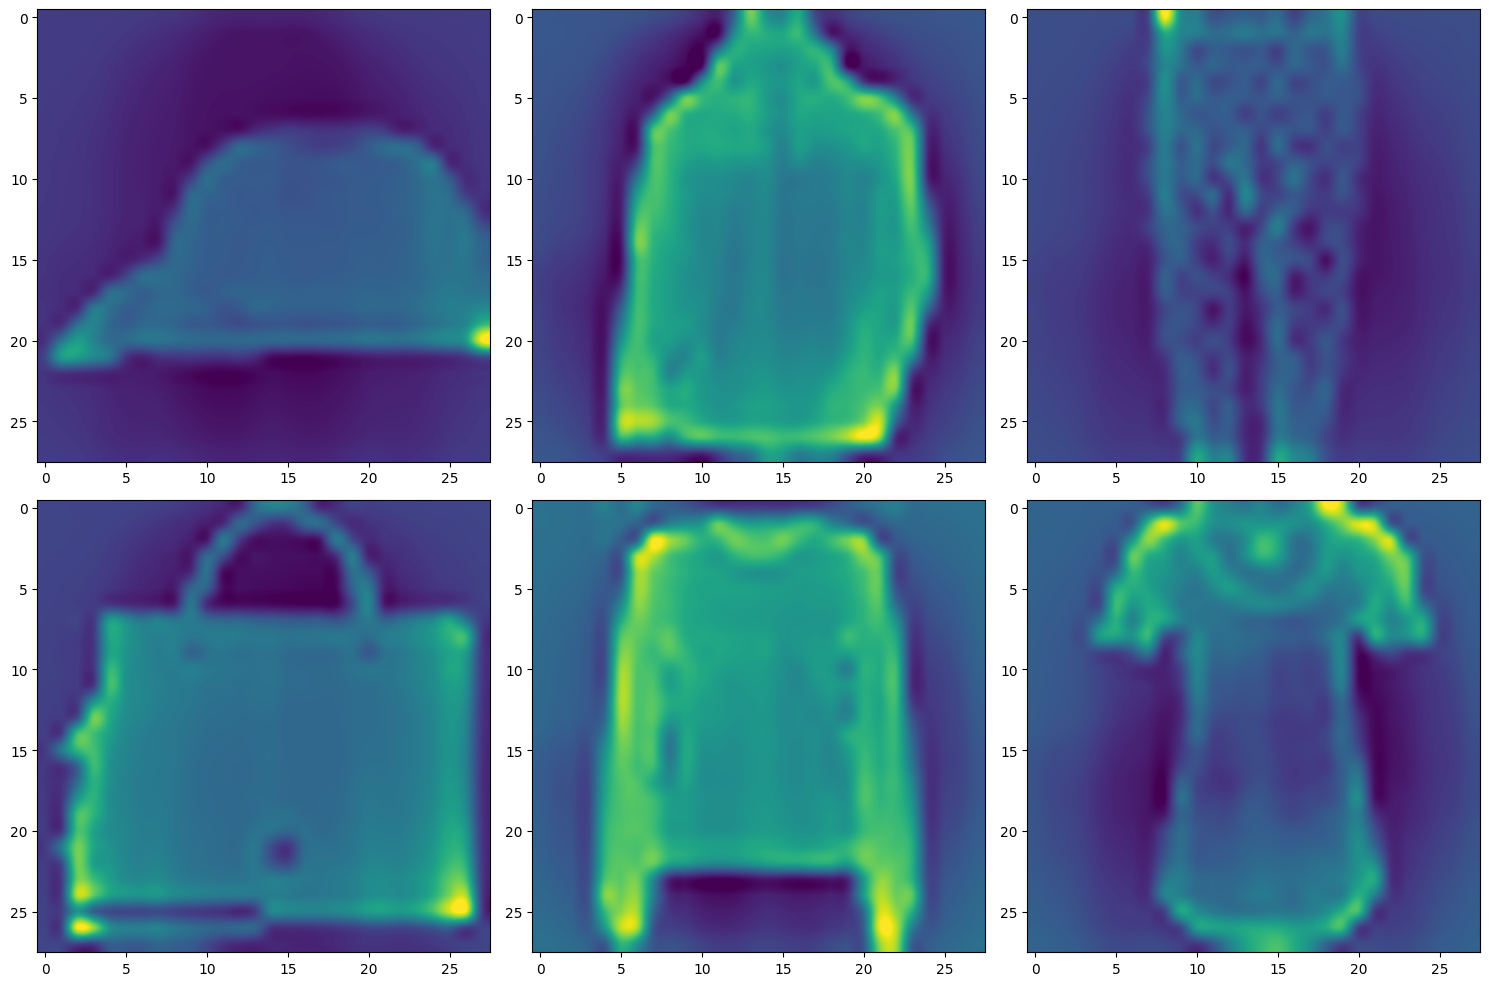

In [13]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
num=0
for i in range(2):
  for j in range(3):
    ax[i][j].imshow(x_t[num].reshape(28,28),interpolation='spline16')
    num+=1
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

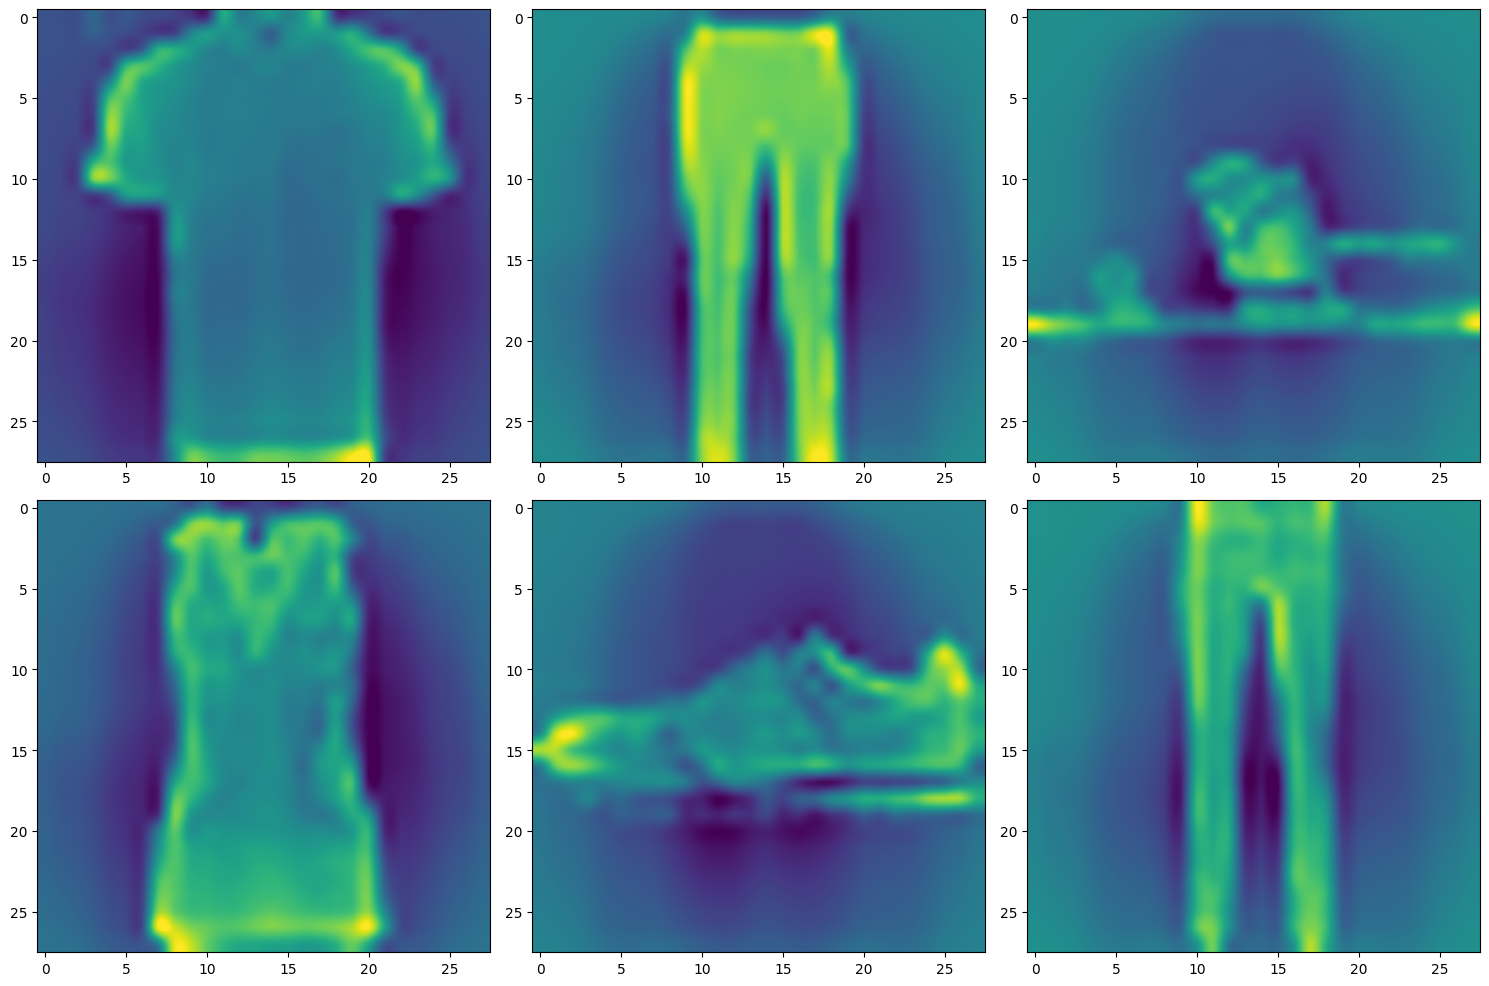

In [14]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
num=0
for i in range(2):
  for j in range(3):
    ax[i][j].imshow(x_chk[num].reshape(28,28),interpolation='spline16')
    num+=1
plt.tight_layout()
plt.show

In [15]:
def knn(x,t,k,y):
  d={}
  l=[]
  c=0
  for a,b in zip((np.sum((x-t)**2,axis=1))**0.5,y):d[a]=b
  for i in sorted(d):
      if (c<k):
          l.append(d[i])
          c+=1
  return np.bincount(np.array(l)).argmax()

In [16]:
y_hat=[]
for i in range(10000):
  y_hat.append(knn(x_t,x_chk[i],7,y_t))
np.mean(np.array(y_hat)==y_chk)*100

84.14

In [17]:
new_data=pd.read_csv('/content/drive/MyDrive/WOC ML Data/classification_test.csv')
new_a=new_data.to_numpy()
new_a

array([[25672,     0,     0, ...,     0,     0,     0],
       [59964,     0,     0, ...,     0,     0,     0],
       [66230,     0,     0, ...,     0,     0,     0],
       ...,
       [99226,     0,     0, ...,     0,     1,     0],
       [58519,     0,     1, ...,     0,     0,     0],
       [80458,     0,     0, ...,     0,     0,     0]])

In [18]:
new_a.shape

(10000, 785)

In [19]:
x_test=(new_a[:,range(1,785)]-mean_t)/dev_t
x_test

array([[-0.01249488, -0.0247104 , -0.03749339, ..., -0.15659207,
        -0.08943918, -0.03884714],
       [-0.01249488, -0.0247104 , -0.03749339, ..., -0.15659207,
        -0.08943918, -0.03884714],
       [-0.01249488, -0.0247104 , -0.03749339, ..., -0.15659207,
        -0.08943918, -0.03884714],
       ...,
       [-0.01249488, -0.0247104 , -0.03749339, ..., -0.15659207,
         0.02288632, -0.03884714],
       [-0.01249488,  5.72189315,  3.44486484, ..., -0.15659207,
        -0.08943918, -0.03884714],
       [-0.01249488, -0.0247104 , -0.03749339, ..., -0.15659207,
        -0.08943918, -0.03884714]])

In [20]:
y_test=[]
for i in range(x_test.shape[0]):
  y_test.append(knn(x_t,x_test[i],7,y_t))
y_test

[0,
 1,
 2,
 2,
 3,
 6,
 8,
 3,
 5,
 0,
 3,
 2,
 2,
 6,
 8,
 5,
 6,
 3,
 6,
 4,
 4,
 4,
 2,
 1,
 5,
 7,
 8,
 6,
 4,
 1,
 9,
 7,
 7,
 8,
 1,
 0,
 9,
 8,
 6,
 8,
 2,
 0,
 4,
 0,
 2,
 0,
 3,
 3,
 2,
 3,
 2,
 4,
 9,
 3,
 0,
 9,
 9,
 4,
 6,
 3,
 4,
 5,
 6,
 6,
 1,
 1,
 0,
 9,
 9,
 2,
 7,
 3,
 2,
 6,
 5,
 7,
 1,
 6,
 1,
 3,
 9,
 6,
 1,
 6,
 4,
 8,
 9,
 4,
 1,
 6,
 3,
 6,
 6,
 2,
 6,
 0,
 4,
 7,
 7,
 3,
 9,
 3,
 9,
 6,
 8,
 2,
 3,
 8,
 2,
 7,
 5,
 5,
 4,
 2,
 7,
 5,
 0,
 2,
 7,
 3,
 0,
 5,
 4,
 4,
 7,
 0,
 5,
 5,
 0,
 3,
 1,
 7,
 9,
 4,
 9,
 6,
 4,
 4,
 6,
 4,
 3,
 3,
 3,
 2,
 2,
 6,
 4,
 0,
 1,
 3,
 4,
 3,
 3,
 1,
 9,
 3,
 3,
 0,
 9,
 5,
 6,
 7,
 7,
 3,
 4,
 4,
 0,
 0,
 7,
 2,
 6,
 8,
 9,
 0,
 6,
 4,
 6,
 5,
 7,
 9,
 7,
 1,
 3,
 9,
 1,
 7,
 5,
 6,
 0,
 7,
 4,
 9,
 1,
 6,
 0,
 0,
 2,
 4,
 0,
 9,
 0,
 4,
 2,
 5,
 5,
 8,
 0,
 2,
 1,
 9,
 2,
 4,
 7,
 1,
 9,
 5,
 9,
 0,
 2,
 8,
 5,
 7,
 7,
 0,
 2,
 4,
 5,
 7,
 8,
 1,
 9,
 5,
 0,
 2,
 9,
 7,
 4,
 0,
 9,
 2,
 1,
 5,
 7,
 7,
 0,
 2,
 4,
 5,
 3,
 3,


<function matplotlib.pyplot.show(close=None, block=None)>

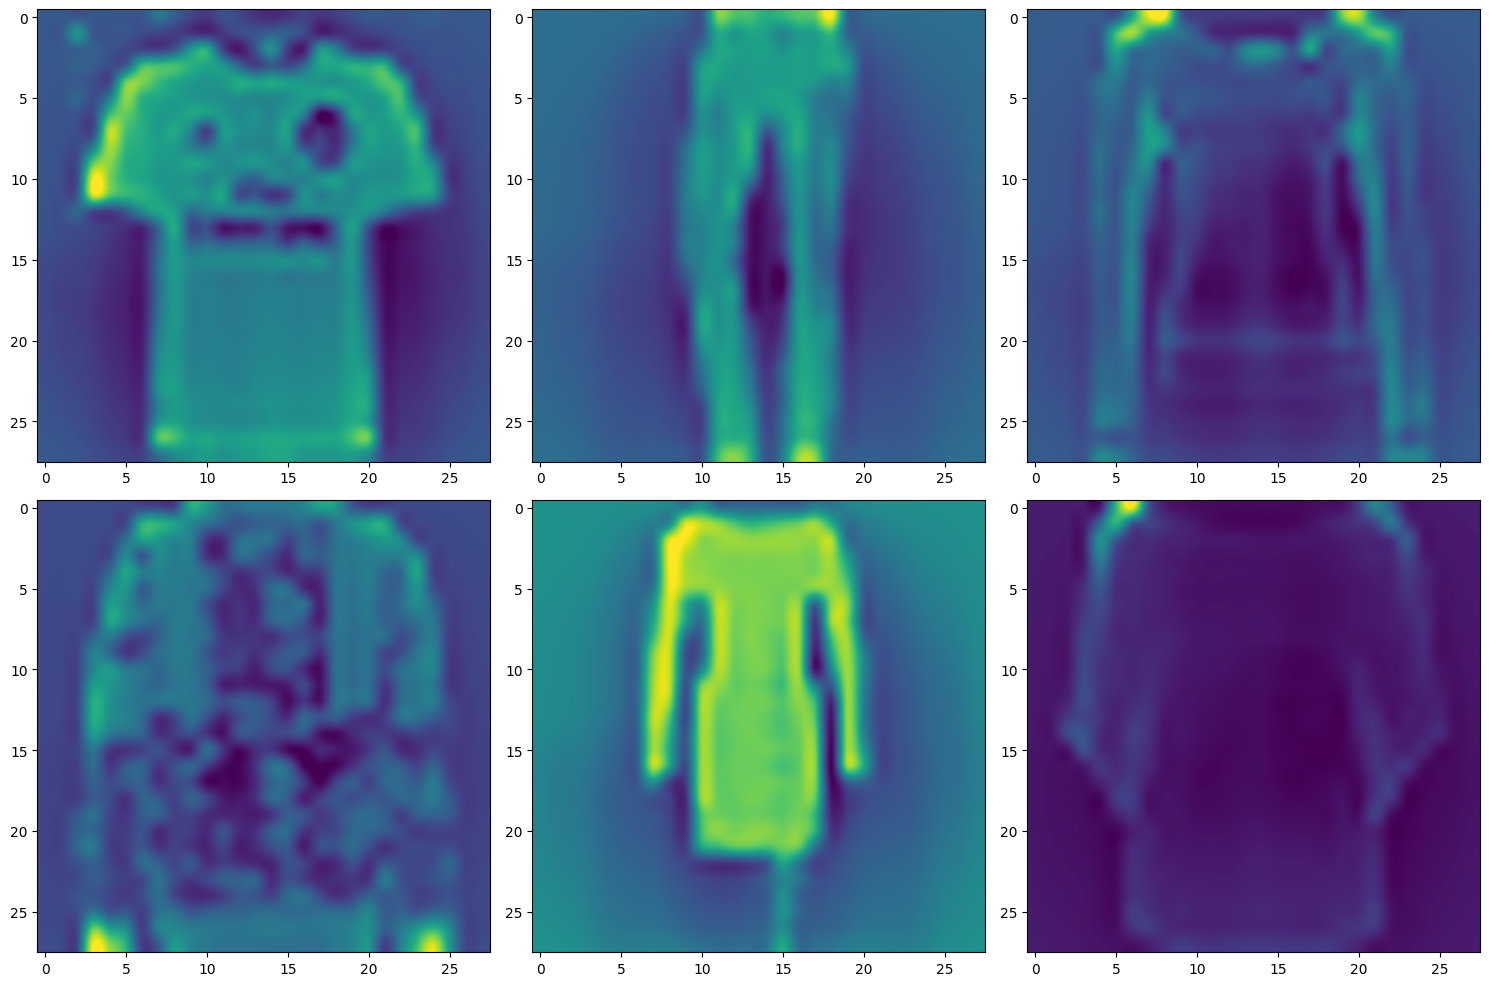

In [21]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
num=0
for i in range(2):
  for j in range(3):
    ax[i][j].imshow(x_test[num].reshape(28,28),interpolation='spline16')
    num+=1
plt.tight_layout()
plt.show

In [22]:
Predictions=new_data.drop(new_data.columns[[i for i in range(1,785)]], axis=1)
Predictions['Predicted']=y_test
Predictions.to_csv('/content/drive/MyDrive/WOC ML Data/KNN_Predictions.csv', index=False)